In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
version_dict = {'version_2': 'mobilenetv3', 
                'version_3': 'efficientnet_b0',
                'version_4': 'efficientnet_b3',
                'version_5': 'regnetx',
                'version_6': 'regnety',
                'version_8': 'fbnet'}

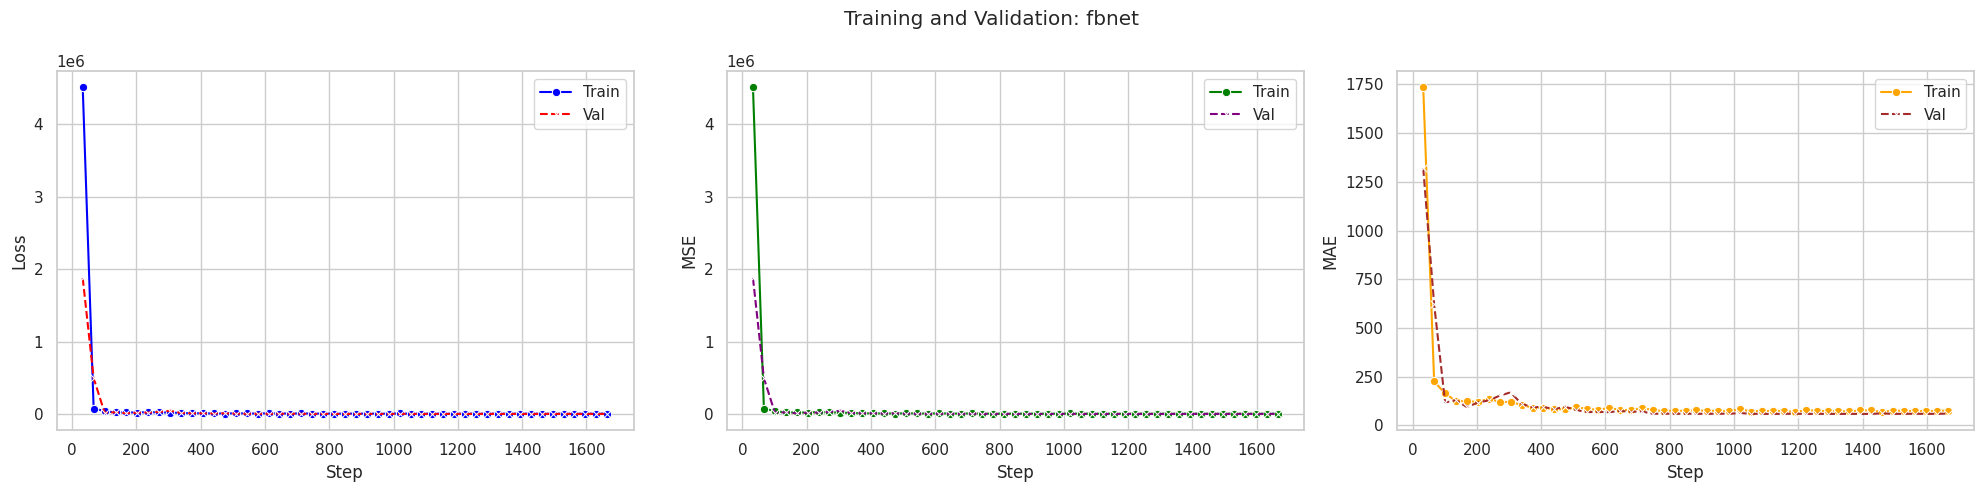

In [9]:
def plot_loss_mse_mae(
    train_loss, train_mse, train_mae, val_loss, val_mse, val_mae, version, save_dir
):
    sns.set(style="whitegrid", font_scale=1)
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"Training and Validation: {version_dict[version]}")

    # Plot training loss
    ax1 = plt.subplot(1, 3, 1)
    sns.lineplot(
        x="Step",
        y="Value",
        data=train_loss,
        label="Train",
        linestyle="-",
        marker="o",
        color="blue",
    )
    sns.lineplot(
        x="Step", y="Value", data=val_loss, label="Val", linestyle="--", marker="x", color="red"
    )
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Loss")
    ax1.legend()

    # Plot training MSE
    ax2 = plt.subplot(1, 3, 2)
    sns.lineplot(
        x="Step",
        y="Value",
        data=train_mse,
        label="Train",
        linestyle="-",
        marker="o",
        color="green",
    )
    sns.lineplot(
        x="Step", y="Value", data=val_mse, label="Val", linestyle="--", marker="x", color="purple"
    )
    ax2.set_xlabel("Step")
    ax2.set_ylabel("MSE")
    ax2.legend()

    # Plot training MAE
    ax3 = plt.subplot(1, 3, 3)
    sns.lineplot(
        x="Step",
        y="Value",
        data=train_mae,
        label="Train",
        linestyle="-",
        marker="o",
        color="orange",
    )
    sns.lineplot(
        x="Step", y="Value", data=val_mae, label="Val", linestyle="--", marker="x", color="brown"
    )
    ax3.set_xlabel("Step")
    ax3.set_ylabel("MAE")
    ax3.legend()

    # Save the plot
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{version}_train_val_loss_mse_mae.png"))
    plt.show()


version_dict = {'version_2': 'mobilenetv3', 
                'version_3': 'efficientnet_b0',
                'version_4': 'efficientnet_b3',
                'version_5': 'regnetx',
                'version_6': 'regnety',
                'version_8': 'fbnet'}

ver = 'version_2'

train_loss = pd.read_csv(f'/mnt/code/EDA_apple_sorting/assets/regressor-logging/train/train_loss/results_tb_logs_lightning_logs_{ver}.csv')
train_mse = pd.read_csv(f'/mnt/code/EDA_apple_sorting/assets/regressor-logging/train/train_mse/results_tb_logs_lightning_logs_{ver}.csv')
train_mae = pd.read_csv(f'/mnt/code/EDA_apple_sorting/assets/regressor-logging/train/train_mae/results_tb_logs_lightning_logs_{ver}.csv')

val_loss = pd.read_csv(f'/mnt/code/EDA_apple_sorting/assets/regressor-logging/val/val_loss/results_tb_logs_lightning_logs_{ver}.csv')
val_mse = pd.read_csv(f'/mnt/code/EDA_apple_sorting/assets/regressor-logging/val/val_mse/results_tb_logs_lightning_logs_{ver}.csv')
val_mae = pd.read_csv(f'/mnt/code/EDA_apple_sorting/assets/regressor-logging/val/val_mae/results_tb_logs_lightning_logs_{ver}.csv')


plot_loss_mse_mae(train_loss, train_mse, train_mae, val_loss, val_mse, val_mae, version='version_8', save_dir='./logging/')